---
# **PROJECT 1: HDAT9500 T2 2025**

---







---

**zID:** z5650460

**Name:** Prerna Roy

**Date of Submission:** 15 July 2025

This notebook covers the tasks set in Project 1 of HDAT9500. It develops a logistic regression model to classify tumours as benign or malignant. The git version control of this notebook can be found in my GitHub repository [here](https://github.com/prerna-roy/hdat9500_project1).



---



---



---





---



---



---



#####################################################################################

Declaratation:

I, Prerna Roy (zID: z5650460), affirm that this assessment is my own original work. I have not submitted this work for credit
elsewhere, before this course, or for any other purpose outside of this course.

I understand that the assessor may:


*   Share this work with another university faculty member for assessment purposes.
*   Submit this work to a plagiarism detection service, which might store a copy for future checks.
*   May use this assessment item for Scholarship of Teaching and Learning (SOTL) purposes, including educational research and
teaching demonstration.

#####################################################################################

# <font color="green">**Question 1: Project Preparation (8 marks)**</font>
## Write the health data science question. **In addition**, include the following *key considerations*.


## **Health Data Science Research Question**
How can we use a logistic regression classification model to accurately predict whether a tumour is malignant or benign based on fine needle aspiration measurements and patient age demographic categories to support clinical decision-making?

---

## <font color="green">***Key Considerations:***</font>


---


---

## Understanding the Health Question and Requirements

1. **Tumour**  
   **What exactly does it mean for a tumour to be malignant or benign?**
A tumour, generally, is an abnormal mass of cells in the body which is caused by cells dividing more than normal or not dying when they should. A benign tumour is a **noncancerous** collection of cells. Benign tumours are slower to grow and do not spread to other parts of the body. They may not cause symptoms but large benign tumours may press on nearby tissue and organs, which can cause discomfort. Malignant tumours are **cancerous** cells. They grow quickly and have irregular borders, and will often invade surrounding tissue. They can spread to other parts of the body through a process known as metastasis. Cancerous cells can also travel to other parts of the body through the blood and lymphatic system.

Sources:
* [JAMA Network - Oncology](https://jamanetwork.com/journals/jamaoncology/fullarticle/2768634)
* [Cleveland Clinic](https://my.clevelandclinic.org/health/diseases/22121-benign-tumor)

2. **Importance**  
   **Why is it critical to accurately classify tumour types from a healthcare perspective?**
It is critical to accurately classify tumour types because the incorrect classification of a tumour can have fatal consequences. If a tumour is indeed malignant and therefore cancerous, it has a high chance of spread to other parts of the body through the bloodstream and lymphatic system. This can lead to rapid progression of the disease, which is extremely harmful especially if removal or treatment of the original tumour would have majorly prevented disease progression.

3. **Implications**

   **What real-world consequences could a false classification have for patients?**

Misclassifying a malignant tumour as benign may mean a patient will go untreated until it is potentially too late, as tumour stage and the level of metastasis can impact the chance of survival hugely. Equally, on the other side, classifying a benign tumour as malignant can lead to potentially unecessary medical intervention, which can be costly and psychologically taxing for the patient.

---

## Reframing the Health Question as a Data Science Problem

4. **Classification Goal**  
   *We aim to build a model that outputs [describe the intended output]. Is our output continuous, categorical, ...?*

   I aim to build a model that outputs a (binary) categorical classification of a tumour as either benign or malignant.

5. **Method Selection**  
   *Which methods or models from the ones we have studied so far could we use to answer this question?*

   Of the models we have studied so far, we can use linear regression, logisitic regression for classification, decision trees and/or random forest to answer this classification question. Logistic regression is chosen for this project, likely because tree-based methods often suffer from overfitting. Linear regression, while it can be used for classification, may be too simple of a model relative to the number of features available in the dataset.

6. **Method Evaluation – Success Criteria**  
   Decide on evaluation metrics (e.g. accuracy, F1 score, precision, recall) that best capture “success” in a medical context.

   The evaluation metric used will be the F1 score. The F1 score, as defined by [Google Developers](https://developers.google.com/machine-learning/crash-course/classification/accuracy-precision-recall), is the harmonic mean of precision and recall. It balances the importance of precision and recall as metrics; when precision and recall are close in value, the F1-score will also be close to their value and when precision and recall are far apart, the F1 score will be similar to whichever metric is worse. This is important as recall is used when false negatives are more important than false positives, and precision is used when it is important for positive predictions to be accurate. In a medical setting, both of these situations co-exist, as misclassification either way can lead to devastating consequences. Thus the F1-score can provide a metric that is balanced in the effect of either type of misclassification.

7. **Data**  
   *Reflect on the data available (e.g. Wisconsin dataset) and what you know about it.*

   The Wisconsin dataset is a dataset often used in machine learning and medical research. The features are computed from digitised images of fine needle aspirate (FNA) of breast masses. The features describe characteristics of cell nuclei that are present in the images in order to differentiate between malignant (cancerous) tumours, and benign (non-cancerous) tumours. The dataset consists of 30 numerical tumour features derived from the digitised images of breast masses, alongside ID numbers for each patient and a diagnosis label of either `M` (malignant) or `B` (benign), as well as an encoded age-group value. The tumour features have three groups of measurements:
      * Mean values of various characteristics of the tumour.
      * Standard error of these measurements.
      * Worst (the largest) values for each characteristic.

The following table outlines the tumour features that are found in the Wisconsin dataset:

Tumour Feature Group | Features
--- | ---
`mean` | `radius, texture, perimeter, area, smoothness, compactness, concavity, concave_points, symmetry, fractal_dimension`
`se` | `radius, texture, perimeter, area, smoothness, compactness, concavity, concave_points, symmetry, fractal_dimension`
`worst` | `radius, texture, perimeter, area, smoothness, compactness, concavity, concave_points, symmetry, fractal_dimension`

8. **Hardware**  
   *Consider whether the dataset will run smoothly in Colab (given its relatively small size).*

   The dataset should run smoothly in Colab given its relatively small size. The hardware for this project is appropriately chosen.

9. **Software and Libraries**  
   *List and justify the software and libraries you intend to use.*

   The software used will primarily be Google CoLab to create the notebook. Git/GitHub is also used as an additional tool of version control, though Google CoLab notebooks have an in-built version control as well.

   The libraries used are as follows, with the following justification:

Library Name | Justification
----- | ------
pandas (pd) | Reading, cleaning and manipulating tabular data. `pd.set_option` configures display of dataframes in the notebook (e.g. show all columns).
numpy (np) | Efficient array operations and numerical computations for feature engineering and metrics.
seaborn (sns) | To create statistical visualisations, such as histograms and heatmaps, to explore feature distributions and correlations.
matplotlib.pyplot (plt) | Plotting library for creating graphs and figures.
train_test_split (sklearn.model_selection) | Splitting the dataset into training and test subsets to validate model generalisation.
GridSearchCV (sklearn.model_selection) | Automated hyperparameter tuning with cross-validation to identify the best model settings.
Pipeline (sklearn.pipeline) | Encapsulating scaling and model training steps into a single, reproducible workflow.
LogisticRegression (sklearn.linear_model) | Fitting a binary classification model to predict malignant vs. benign tumours.
classification_report (sklearn.metrics) | To generating precision, recall, F1-score for per-class evaluation.
confusion_matrix (sklearn.metrics) | Computing true/false positives and negatives to summarise classification errors.
StandardScaler (sklearn.preprocessing) | Scaling features to zero mean and unit variance to improve solver convergence.
ConfusionMatrixDisplay (sklearn.metrics) | Rendering the confusion matrix as an intuitive visual plot for quick error analysis.
display (IPython.display) | Inline rendering of DataFrames and rich outputs in Jupyter/Colab notebooks.


10. **Version Control**  
   *Explain how you will manage and track changes.*

   Google CoLab keeps a revision history of the notebook. To extend version control, I will attempt to commit to Git and maintain version control there too. The GitHub repository can be found [here](https://github.com/prerna-roy/hdat9500_project1/).

11. **Table of Variables and Constants**  
   *Include **all** variables and constants used in this notebook along with their definitions.*

Variable Name | Type | Definition
---|---|---
df | pd.DataFrame | Dataframe with the features and outcome (diagnosis) of the Wisconsin Dataset.
variables | dict | Dictionary containing the definition of each column in the dataset.
num_df | pd.DataFrame | Dataframe containing the numerical feature columns of the dataset.
corr_matrix | pd.DataFrame | Dataframe with the correlations of each numerical column of the dataset.
mask | numpy.ndarray | A numerical mask to mask out the self-correlated and repeated correlations.
upper_corr | pd.DataFrame | Dataframe with the mask applied to the correlations.
corr_pairs | pd.DataFrame | Dataframe with the mask applied that is organised by correlation as the index.
corr_m | pd.DataFrame | Dataframe with correlations sorted by the features that are most strongly correlated to malignant diagnosis.
X_train | pd.DataFrame |  Dataframe with the selected features to train the model.
X_test | pd.DataFrame | Dataframe with the feature data that the model will be tested on.
y_train | pd.DataFrame | Dataframe with the outcome (1 = malignant, 0 = benign) for the training data.
y_test | pd.DataFrame | Dataframe with the outcome (1 = malignant, 0 = benign) for the testing data.
log_reg | sklearn Logistic Regression model | Logistic Regression model from sklearn.
pipeline | sklearn Pipeline | Pipeline used to sequentially apply transformers to the data for preprocessing and model training and prediction.
param_grid | dict | Dictionary containing parameters to be passed to the GridSearchCV.
gs_log_reg | sklearn GridSearchCV | GridSearchCV object that searches over all specified parameters for an estimator.
predictions_train | numpy.ndarray | Numpy array with the predicted values from the best model found by grid search on the training data.
cm_train | numpy.ndarray | Numpy array containing the confusion matrix results for the training data.
predictions_test | numpy.ndarray | Numpy array with the predicted values from the best model found by grid search on the testing data.
cm_test | numpy.ndarray | Numpy array containing the confusion matrix results for the testing data.



# <font color="green"> **Question 2: Data (10 marks)**</font>


You can access the dataset using the following code snippet — please avoid using hardcoded file paths.
You can also preview the data [here](https://drive.google.com/file/d/1F5vzyK32L4JSckD9-_nvoF003v_GqLu7/view).

In [1]:
import pandas as pd

url = 'https://raw.githubusercontent.com/cbdrh-HDAT9500-T2-2025/Data-Project-1/refs/heads/main/FNA-Breast-Cancer-Tumour-Dataset.csv'
df = pd.read_csv(url)

## Perform exploratory data analysis on the [dataset](https://drive.google.com/file/d/1F5vzyK32L4JSckD9-_nvoF003v_GqLu7/view?usp=sharing), and then prepare it for subsequent steps.

Apart from any other steps you deem relevant for exploratory data analysis, please include:

- **Descriptive statistics**: Use the `pandas` function `describe()` to summarise the variables.  
- **Correlations**: Calculate and examine the correlations between variables.  
- **Data preparation**: Prepare the data for use in the algorithms you will create. Specifically, divide the data into an 80% training set and a 20% test set using `train_test_split` with a random seed of 2025. You may set any other `train_test_split` parameters as you see fit.

**The data custodians who provided the dataset informed us that it differs from the original in three primary ways:**

1. Some patients underwent two Fine Needle Aspirations (FNAs), each performed some time apart. Both tests were performed correctly.
2. The dataset includes a categorical variable called *age*, which is coded as follows:  
   - Women aged 18–34: `105`  
   - Women aged 35–49: `3`  
   - Women aged 50–64: `88`  
   - Women over 65: `5`  

### Libraries and Imports

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import ConfusionMatrixDisplay
from IPython.display import display

### **Descriptive Statistics of the Dataset**
We first observe the dataset and the features inside it. By using a data dictionary provided from earlier notebooks in HDAT9500 and extending it to include the new information of the age groups of the patients, we begin understanding what features are included. This step is helpful as it can help us later with feature selection.

Prior to feature selection, we will overview the entire dataframe to observe whether there are unexpected or anomalous data points. Through this step, we can begin to clean the dataframe. Since this dataset also provides age group information that is encoded, we will get the 'dummies' of these data points. This is important as many machine learning models accept only numeric inputs, including logistic regression. It can also avoid false ordinality, which may occur due to the way the age groups were encoded with a specific number that may imply a rank/ordinality that does not actually exist.

The variables are divided into the mean, standard error, and worst of various features of tumours. With this in mind, we can check if any features are highly correlated with each other, and which features are more strongly correlated with a malignant diagnosis. This can help us with some naive-level feature selection and reduce dimensionality of the model.

In [3]:
# Define all variables in the given dataset
variables = {
    "id": "ID number",
    "diagnosis": "Malignant (M) or Benign (B) tumour",
    "radius_mean": "Mean radius of the tumour",
    "texture_mean": "Mean texture (standard deviation of grey-scale values)",
    "perimeter_mean": "Mean perimeter of the tumour",
    "area_mean": "Mean area of the tumour",
    "smoothness_mean": "Mean smoothness (local variation in radius lengths)",
    "compactness_mean": "Mean compactness (perimeter^2 / area - 1.0)",
    "concavity_mean": "Mean concavity (severity of concave portions)",
    "concave_points_mean": "Mean concave points (number of concave portions of contour)",
    "symmetry_mean": "Mean symmetry",
    "fractal_dimension_mean": "Mean fractal dimension (coastline approximation - 1)",
    "radius_se": "Standard error for the radius",
    "texture_se": "Standard error for the texture",
    "perimeter_se": "Standard error for the perimeter",
    "area_se": "Standard error for the area",
    "smoothness_se": "Standard error for smoothness",
    "compactness_se": "Standard error for compactness",
    "concavity_se": "Standard error for concavity",
    "concave_points_se": "Standard error for concave points",
    "symmetry_se": "Standard error for symmetry",
    "fractal_dimension_se": "Standard error for fractal dimension",
    "radius_worst": "Worst (largest) radius",
    "texture_worst": "Worst texture",
    "perimeter_worst": "Worst perimeter",
    "area_worst": "Worst area",
    "smoothness_worst": "Worst smoothness",
    "compactness_worst": "Worst compactness",
    "concavity_worst": "Worst concavity",
    "concave_points_worst": "Worst concave points",
    "symmetry_worst": "Worst symmetry",
    "fractal_dimension_worst": "Worst fractal dimension",
    "age": "Age group of the patient (18 to 34: 105; 35 to 49: 3; 50 to 64: 88; 65+: 5)"
}

# Convert to a DataFrame for easy display
variables_df = pd.DataFrame(list(variables.items()), columns=["Variable", "Definition"])

# Display the table and set display to make all info visible
with pd.option_context('display.max_colwidth', None, 'display.max_rows', None):
  display(variables_df)

,Variable,Definition
0,id,ID number
1,diagnosis,Malignant (M) or Benign (B) tumour
2,radius_mean,Mean radius of the tumour
3,texture_mean,Mean texture (standard deviation of grey-scale values)
4,perimeter_mean,Mean perimeter of the tumour
5,area_mean,Mean area of the tumour
6,smoothness_mean,Mean smoothness (local variation in radius lengths)
7,compactness_mean,Mean compactness (perimeter^2 / area - 1.0)
8,concavity_mean,Mean concavity (severity of concave portions)
9,concave_points_mean,Mean concave points (number of concave portions of contour)


In [4]:
# Get descriptive statistics of all columns in the dataset
with pd.option_context('display.max_colwidth', None, 'display.max_columns', None):
  display(df.describe(include="all"))

,ID,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,age,diagnosis_dup
count,5.800000e+02,580,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580
unique,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B
freq,NaN,364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,364
mean,2.986620e+07,NaN,14.127347,19.270579,91.933647,655.865069,0.096361,0.104183,0.088672,0.049003,0.181296,0.062810,0.405238,1.210764,2.862516,40.382190,0.007088,0.025461,0.031909,0.011846,0.020587,0.003855,16.267414,25.637552,107.218621,879.966207,0.132337,0.253301,0.271466,0.114350,0.290109,0.083965,48.918966,NaN
std,1.238820e+08,NaN,3.516919,4.304546,24.234721,351.671865,0.014020,0.052556,0.079563,0.038789,0.027296,0.007039,0.277146,0.550302,2.015825,45.387512,0.003018,0.017773,0.030068,0.006164,0.008210,0.002687,4.816971,6.133217,33.468178,567.118547,0.022841,0.156327,0.207933,0.065487,0.061628,0.017967,47.590858,NaN
min,3.384000e+03,NaN,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.800000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.400000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,3.000000,NaN
25%,8.690778e+05,NaN,11.707500,16.170000,75.200000,420.300000,0.086400,0.064815,0.029575,0.020348,0.162075,0.057775,0.233225,0.828425,1.605000,17.857500,0.005201,0.013307,0.015130,0.007701,0.015200,0.002256,13.045000,21.052500,84.175000,515.675000,0.116600,0.147055,0.116625,0.064730,0.250475,0.071733,5.000000,NaN
50%,9.060010e+05,NaN,13.390000,18.835000,86.415000,552.050000,0.095895,0.092525,0.061400,0.033600,0.179320,0.061545,0.321750,1.094000,2.282500,24.485000,0.006409,0.020475,0.025805,0.011080,0.018785,0.003224,14.980000,25.370000,97.850000,688.100000,0.131250,0.211650,0.225450,0.099425,0.282050,0.080015,5.000000,NaN
75%,8.812940e+06,NaN,15.780000,21.785000,103.875000,784.150000,0.105300,0.130425,0.129650,0.073730,0.195700,0.066215,0.479800,1.471500,3.360000,45.237500,0.008261,0.032209,0.041587,0.014833,0.023532,0.004575,18.767500,29.547500,125.175000,1073.500000,0.146025,0.335150,0.379925,0.161300,0.318025,0.092082,105.000000,NaN


According to the descriptive statistics, there is no missing data for any of the columns (as seen by the `count` value for all columns being 580, which is the number of samples in the dataset).

In [5]:
# Get data type of all columns
df.dtypes

,0
ID,int64
diagnosis,object
radius_mean,float64
texture_mean,float64
perimeter_mean,float64
area_mean,float64
smoothness_mean,float64
compactness_mean,float64
concavity_mean,float64
concave points_mean,float64


In [6]:
# Observe values of age
df['age'].value_counts()

,count
age,
105,172
5,167
3,138
88,103


In [7]:
# Get dummies for age
df = pd.get_dummies(df, columns=['age'], dtype = int)

In [8]:
# Check if diagnosis column is equivalent to diagnosis_dup column
df['diagnosis'].equals(df['diagnosis_dup'])

True

In [9]:
# Drop the diagnosis_dup column, as it is equivalent to diagnosis
df = df.drop(columns=['diagnosis_dup'])

According to the descriptive statistics output, there were 3 unique values for diagnosis, even though the data dictionary provided only 2 values (**M** for malignant and **B** for benign). We check what the third value is and how much of the dataset has this unknown third diagnosis.

In [10]:
# Calculate number of patients for each diagnosis
df['diagnosis'].value_counts()

,count
diagnosis,
B,364
M,215
X,1


In [11]:
# Identify patient info where diagnosis == X
df[df['diagnosis'] == 'X']

,ID,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,age_3,age_5,age_88,age_105
536,3384,X,11.67,20.02,75.21,1299.0,0.09156,0.1313,0.1523,0.1015,...,0.1264,0.2037,0.1377,0.06845,0.2249,0.08492,0,0,1,0


In [12]:
# As there is no understood or given meaning for 'X' in diagnosis, remove row
df = df[df['diagnosis'] != 'X']

As there is only 1 row affected by the unknown `X` diagnosis, we drop this row and map our diagnosis as 1 or 0.

In [13]:
# Encode 1 == M and 0 == B
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0}).astype(int)

/tmp/ipython-input-13-1804017777.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0}).astype(int)


In [14]:
# Check for missingness in all of the columns
df.isna().sum()

,0
ID,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


### Correlations in the Dataset

Now that the dataframe has been transformed into only numerical values, we can begin discovering correlations between the variables.

In [15]:
# Get correlations for float64 and int64 data columns, excluding ID
df.select_dtypes(include=['float64', 'int64']).drop(columns=['ID']).corr()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,age_3,age_5,age_88,age_105
diagnosis,1.000000,0.727950,0.416209,0.741000,0.707889,0.358486,0.598611,0.696925,0.776142,0.335084,...,0.414730,0.592097,0.660817,0.794424,0.415628,0.323977,-0.144669,0.354975,0.113765,-0.311874
radius_mean,0.727950,1.000000,0.328372,0.997785,0.987233,0.169375,0.506846,0.678209,0.822396,0.152962,...,0.108677,0.412542,0.529209,0.743991,0.162180,0.003224,-0.091776,0.275039,0.067317,-0.243221
texture_mean,0.416209,0.328372,1.000000,0.334410,0.325538,-0.026744,0.239114,0.305840,0.295021,0.076634,...,0.065949,0.279568,0.304362,0.296994,0.101844,0.114617,-0.063003,0.093129,0.097799,-0.115117
perimeter_mean,0.741000,0.997785,0.334410,1.000000,0.986540,0.206045,0.557817,0.717580,0.850751,0.187823,...,0.140280,0.455303,0.566222,0.771291,0.187365,0.047262,-0.090107,0.275637,0.071015,-0.248452
area_mean,0.707889,0.987233,0.325538,0.986540,1.000000,0.175923,0.499915,0.688250,0.823607,0.156360,...,0.114730,0.390499,0.515921,0.722684,0.142316,0.000880,-0.093008,0.263646,0.057790,-0.222836
smoothness_mean,0.358486,0.169375,-0.026744,0.206045,0.175923,1.000000,0.658228,0.519557,0.552976,0.555343,...,0.802219,0.471280,0.433054,0.503190,0.395436,0.499377,-0.023447,0.116258,0.058522,-0.142184
compactness_mean,0.598611,0.506846,0.239114,0.557817,0.499915,0.658228,1.000000,0.882618,0.830768,0.603606,...,0.559881,0.865953,0.816854,0.816531,0.509659,0.684709,-0.033202,0.176696,0.094263,-0.222803
concavity_mean,0.696925,0.678209,0.305840,0.717580,0.688250,0.519557,0.882618,1.000000,0.921677,0.502967,...,0.440947,0.753608,0.885088,0.861739,0.406826,0.510737,-0.062940,0.225833,0.074035,-0.226926
concave points_mean,0.776142,0.822396,0.295021,0.850751,0.823607,0.552976,0.830768,0.921677,1.000000,0.464979,...,0.444566,0.665812,0.753802,0.910187,0.373080,0.365928,-0.073538,0.263823,0.088860,-0.267066
symmetry_mean,0.335084,0.152962,0.076634,0.187823,0.156360,0.555343,0.603606,0.502967,0.464979,1.000000,...,0.421506,0.473922,0.437351,0.433329,0.698899,0.437509,0.001269,0.110216,0.074729,-0.172750


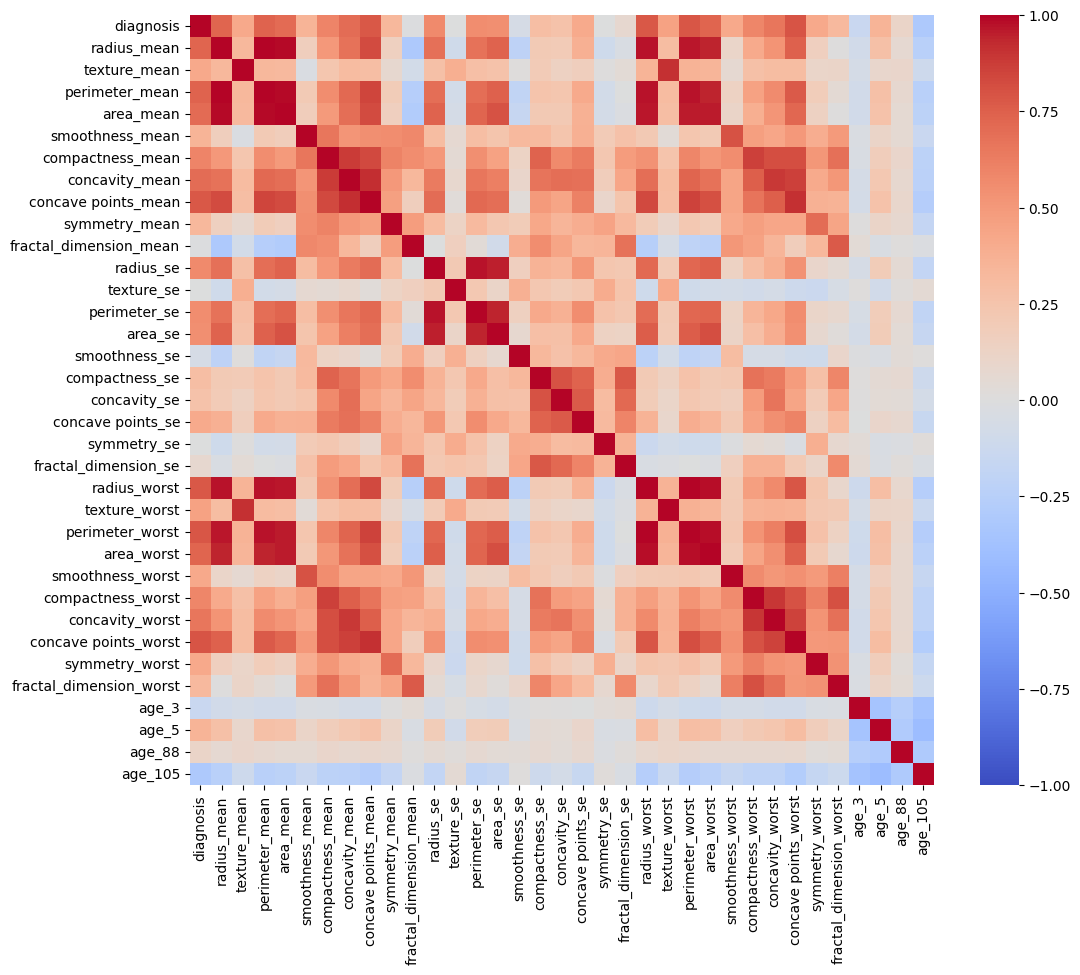

In [16]:
# Create a heatmap for the correlations, excluding ID
plt.figure(figsize=(12, 10))

# Drop ID column, then compute corr on the rest
hm_corr = df.drop(columns=['ID']).corr()
sns.heatmap(hm_corr, annot=False, cmap="coolwarm", vmin = -1, vmax = 1)
xticklabels=1
yticklabels=1
plt.show()

There are over 1000 correlation pairs to look at. Some of these are self-correlated, and many of these are repeated pairs. We reduce these to first look at which variables are strongly correlated with each other:

In [17]:
# Select numeric columns and drop ID
num_df = df.select_dtypes(include=['float64', 'int64']).drop(columns=['ID'])

# Compute absolute correlation matrix
corr_matrix = num_df.corr().abs()

# Mask out the lower triangle and the diagonal
mask = np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
upper_corr = corr_matrix.where(mask)

# Stack, reset index, and sort
corr_pairs = (
    upper_corr
    .stack() # turns matrix into Series of ((feat1, feat2), corr)
    .reset_index(name='correlation')
    .rename(columns={'level_0': 'feature_1', 'level_1': 'feature_2'})
    .sort_values(by='correlation', ascending=False)
    .reset_index(drop=True)
)

# View the top correlated pairs
with pd.option_context('display.max_colwidth', None, 'display.max_rows', None):
  display(corr_pairs.head(20))

,feature_1,feature_2,correlation
0,radius_mean,perimeter_mean,0.997785
1,radius_worst,perimeter_worst,0.993734
2,radius_mean,area_mean,0.987233
3,perimeter_mean,area_mean,0.986540
4,radius_worst,area_worst,0.984021
5,perimeter_worst,area_worst,0.977641
6,radius_se,perimeter_se,0.972941
7,perimeter_mean,perimeter_worst,0.970469
8,perimeter_mean,radius_worst,0.969614
9,radius_mean,radius_worst,0.969533


From the correlated pairs, it is observed that feature `mean` values often correlate strongly with feature `worst` values. It is also seen that `radius_` features correlate strongly with `area_` features and `perimeter_` features.

### Distribution of Tumour Features by Diagnosis

We look at the distributions of the features and how much they differ depending on diagnosis:

In [18]:
def plot_distributions(df, target_col, suffix):
  """
  Plots the distrubtions of all feature columns in the given df whose names end
  with the given suffix (either "mean", "se", or "worst"), coloured by the
  target column, which is the binary outcome column "diagnosis".

  Parameters:
  df : pandas.DataFrame
    The full dataset including the target column.
  target_col : str
    Name of the target column to hue the plots by (e.g., 'diagnosis').
  suffix : str
    Suffix of the feature column names to plot.

  Returns:
  Plot of the distribution of each tumour feature column by suffix.

  """
  # Get the feature names for each column with specified suffix
  feature_cols = [col for col in df.columns if col.endswith(f"_{suffix}")]
  n = len(feature_cols)
  if n == 0:
      raise ValueError(f"No columns found ending with _{suffix}")

  # Create a subplot grid and flatten to make axes indexing easier
  n_cols = 2
  n_rows = int(n / n_cols)
  fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, 3 * n_rows))
  axes = axes.flatten()

  # Plot each feature as a histogram with kde
  for ax, feat in zip(axes, feature_cols):
      sns.histplot(data=df, x=feat, hue=target_col, ax=ax, kde=True, bins=30,
          alpha=0.6)
      ax.set_title(f"{feat} by {target_col}")
      ax.set_xlabel(feat)
      ax.set_ylabel("Count")

  plt.tight_layout()
  plt.show()

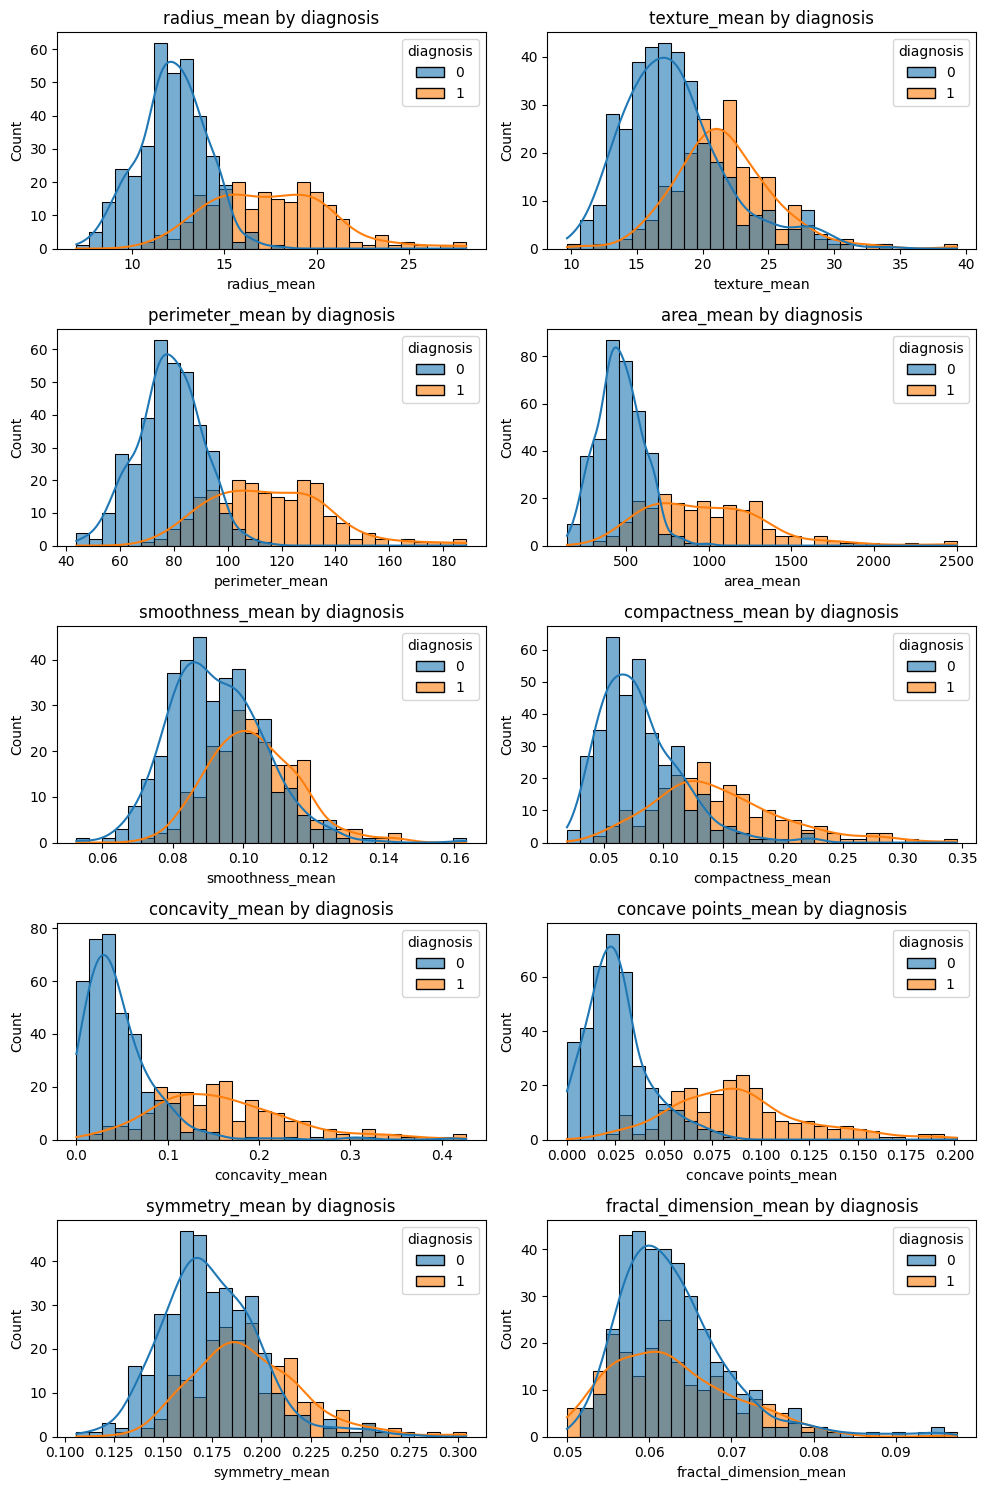

In [19]:
# Plot all “mean” features
plot_distributions(df, target_col='diagnosis', suffix='mean')

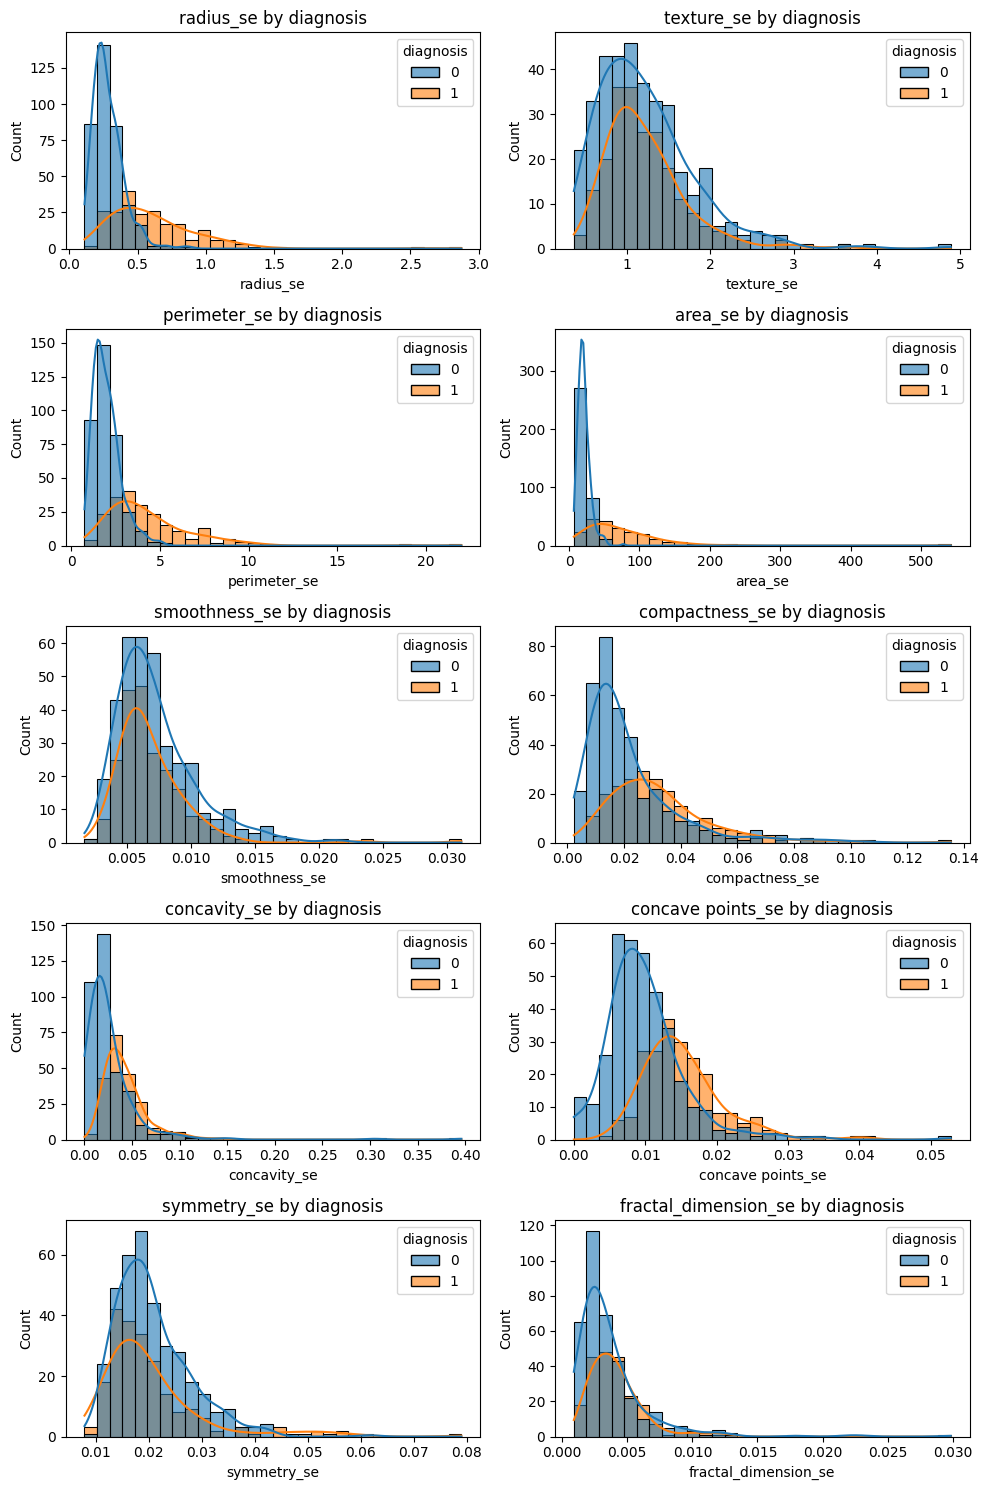

In [20]:
# Plot all “se” features
plot_distributions(df, target_col='diagnosis', suffix='se')

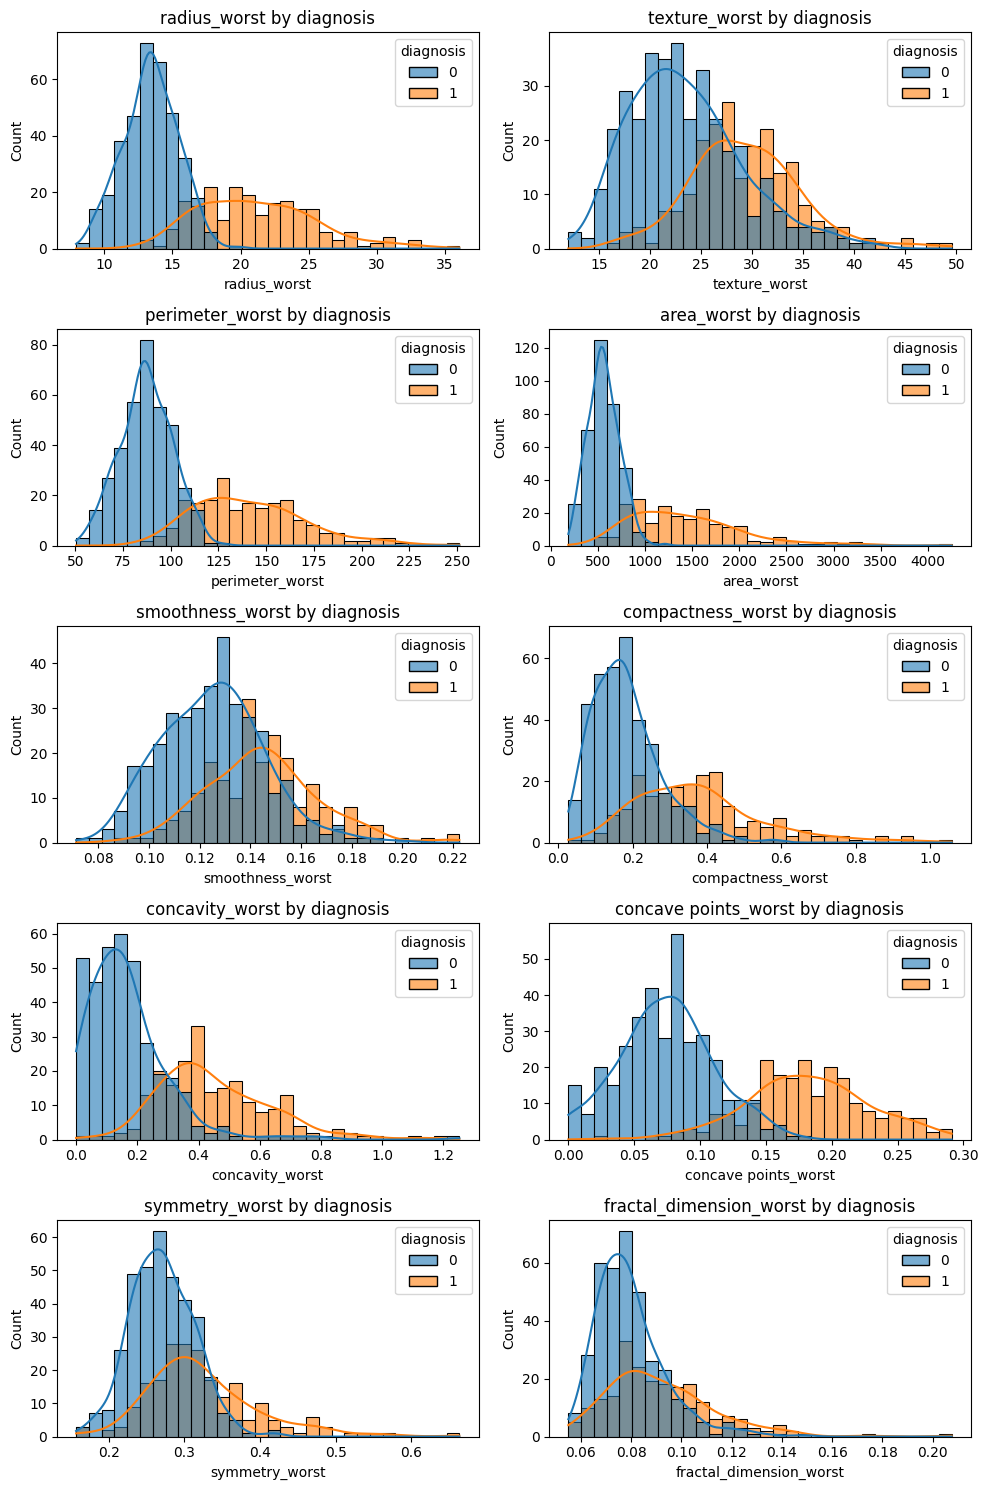

In [21]:
# Plot all “worst” features
plot_distributions(df, target_col='diagnosis', suffix='worst')

We can see that across the different features `mean`, `se`, and `worst` values, there are varying levels of overlap between the distributions for those that are benign and those that are malignant. Some features show significantly better separability than others. Overall, the `se` features have significant amount of overlap, likely because these are actually measures of the standard error rather than a physical dimension of the feature itself the way `mean` and `worst` are. One way to discover which features of `mean` and `worst` correlate most strongly to the outcome of a malignant diagnosis, and narrow down the number of features used to train the model this way. This is a very basic way to start reducing the dimensionality, but may help prevent overfitting and unnecessarily using features that are not strongly correlated with the malignant tumour diagnosis.

In [22]:
# Get the correlations of the top features with diagnosis == M
corr_m = df.corr()["diagnosis"].abs().sort_values(ascending=False)

# Drop the self-correlation at index = "diagnosis"
corr_m = corr_m.drop(index="diagnosis")

# Get the correlations of the top 10 features with diagnosis == M
with pd.option_context('display.max_colwidth', None, 'display.max_rows', None):
  display(corr_m.head(10))

,diagnosis
concave points_worst,0.794424
perimeter_worst,0.782485
concave points_mean,0.776142
radius_worst,0.776019
perimeter_mean,0.741000
area_worst,0.734011
radius_mean,0.727950
area_mean,0.707889
concavity_mean,0.696925
concavity_worst,0.660817


We select the top features by selecting features that have a correlation of $r > 0.7$ with malignancy. This threshold was chosen because it captures moderate to strong linear relationships with malignancy, which aims to ensure the retained features used for training have substantial differentiation power between the benign and malignancy tumours. This threshold aims to balance the number of features needed to robustly develop a model with the need to exclude weakly correlated features that may just introduce noise and contribute very little to separability. This is a simplified form of feature selection that aims to focus on the linear relationships that provide the most informative signals toward malignancy.

In [23]:
# Select the top features as correlations from m_corr with a value of 0.7 or above
top_features = corr_m[corr_m > 0.7]
top_features

,diagnosis
concave points_worst,0.794424
perimeter_worst,0.782485
concave points_mean,0.776142
radius_worst,0.776019
perimeter_mean,0.741000
area_worst,0.734011
radius_mean,0.727950
area_mean,0.707889


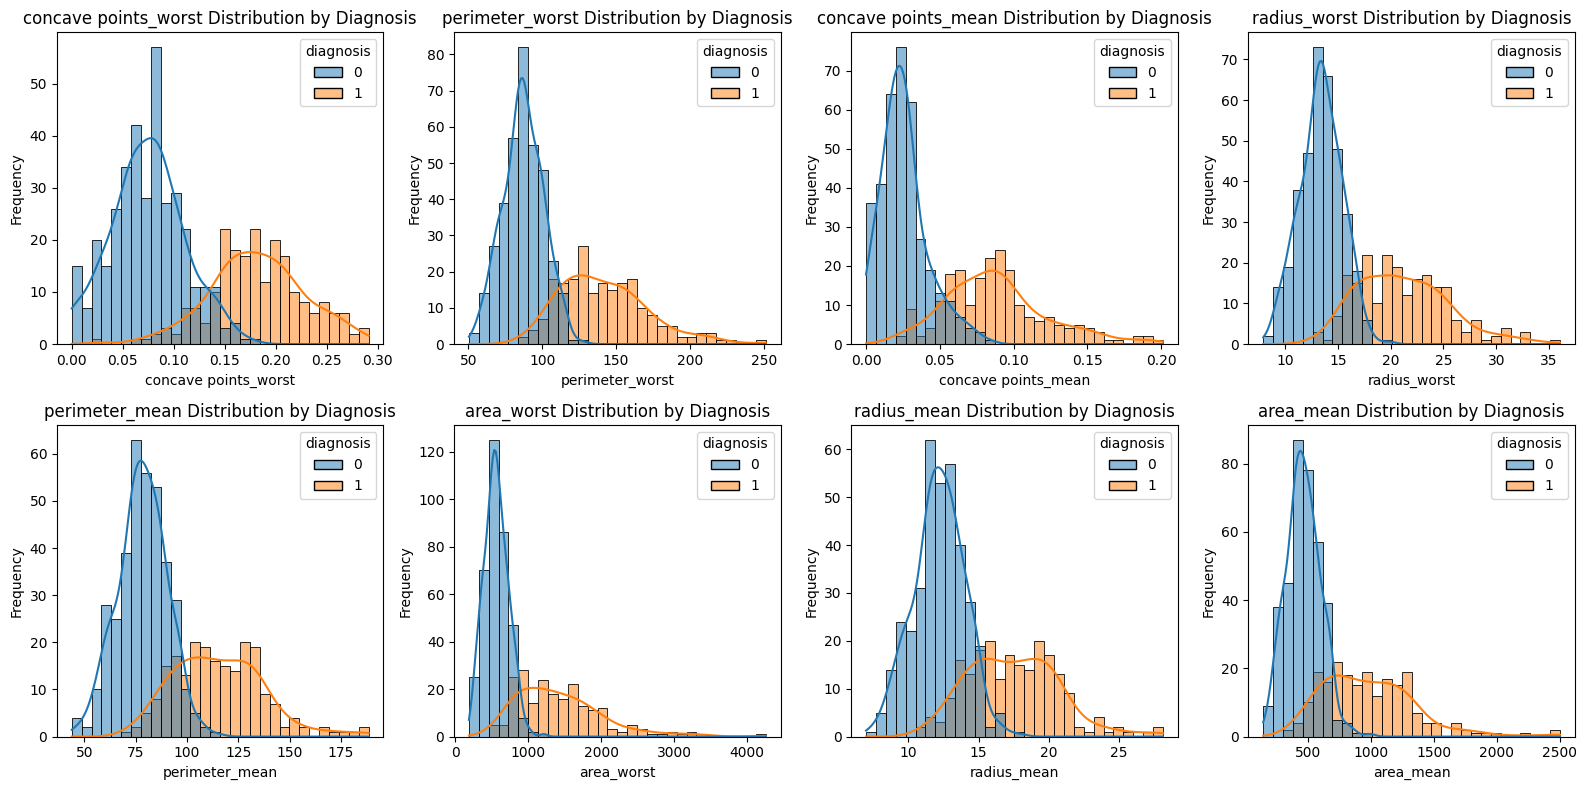

In [24]:
# Visualuse the distribution of the top correlated features with diagnosis
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
axes = axes.flatten()

# Enumerate through the top features
for i, feature in enumerate(top_features.index.tolist()):
    sns.histplot(data=df, x=feature, hue='diagnosis', ax=axes[i], kde=True,
                 bins=30)
    axes[i].set_title(f"{feature} Distribution by Diagnosis")
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

After looking at the features that correlate strongly with malignancy, we can reduce the number of features use in the model. There are several reasons to undergo dimensionality reduction and feature selection. A primary reason is to remove redundant features to allow the model to focus on learning predictive patterns, which in turn may allow it to improve it's performance on new data. It prevents overfitting as well, where the number of features is relatively large for the number of samples used to train the model. This step can also help reduce multicollinearity, which is a likely issue for the dataset at hand: because the measurements of the dataset come from a singular feature's mean, standard error, and worst value, there is a high chance of collinearity and this can be observed from the correlation matrix between all the variables.

From this stage, we can select fewer features to make part of the training and testing data.

In [25]:
# Create an 80-20 train-test split with a random seed of 2025, where X has the
# features from top_features
X = df[top_features.index.tolist()]
y = df['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2025, stratify=y)



---



---



---



# <font color="green">**Question 3: Training and Tuning (10 marks)**</font>


## Train and tune the hyperparameters of a Logistic Regression model. Give the  logistic regression model the name `log_reg`.

Hyper-parameters:

- `penalty`: `l2`, `l1`.
- `C` values: 0.05, 0.5, 5, 50, 500.
- `class_weight`: Choose one of these two combinations of weights (option A or option B) and explain why you think the weights are important.

    * **Option A (Weights specified as Class 1, then Class 0):**

        - (80% for class 1, 20% for class 0)
        - (70% for class 1, 30% for class 0)
        - (60% for class 1, 40% for class 0)
        - None (i.e., no weights)

    * **Option B (Weights specified as Class 0, then Class 1):**

      - (80% for class 0, 20% for class 1)
      - (70% for class 0, 30% for class 1)
      - (60% for class 0, 40% for class 1)
      - None (i.e., no weights)

- `k=4`, that is, 4-fold cross-validation for the grid search.
- Give the grid search object the name `gs_log_reg`.
- `f1` as the score to choose the best model in the grid search.
- `n_jobs`=-1.
- do not change these hyper-parameters.
- if you do not know how to incorporate some of the hyperparameters, please proceed with those you know how to incorporate. This will be reflected in your mark, but you will still receive some credit.


Python code limit:
- 20 lines (comments excluded). You may use as many cells as necessary for these lines.
---

## **Training and Tuning**

A Pipeline is created to standardise the features before using GridSearchCV in the next step. This is important as it avoids data leakage and maintains data integrity. `StandardScaler()` is used to scale the features so that the mean is approximately 0 and standard deviation is approximately 1. Scaling is important so that features that may have larger values or wider range do not create an unfounded 'domination' effect during model training.

I chose the Option A set of class weights for this task. This is because:
1. Option A will up-weight the malignant class (coded as class 1). The malignant tumours are the minority class of this dataset, but they are clinically the significantly more high-risk label.
2. The Option A weights will penalise the misclassified malignant cases more heavily, which can help reduce false negatives. Reducing false negatives is a high priority in cancer diagnosis, as it would mean a patient who actually has cancer may end up not getting the treatment they need due to a false negative result, which can have a fatal outcome.
3. The decision boundary will be shifted to have a greater sensitivity for the malignant class. This can improve the recall of malignant cases without an extreme sacrifice of precision, and can overall yield a better F1 score when the dataset is imbalanced.

The solvers `liblinear` and `saga` are used as they support both `l1` and `l2` regularisation penalties. `liblinear` is optimised for binary classification problems, such as this one, and is generally a good choice for smaller datasets. `saga` can handle multi-class classification problems, and is known to be more sensitive to feature scaling which makes using a scaler such as `StandardScaler()` imperative to the model. It is better suited for larger datasets, which may be useful if this model were to be scaled.

In [26]:
# Set up logistic regression model, pipeline, param_grid and gridsearchcv object
log_reg = LogisticRegression(max_iter = 500)
pipeline = Pipeline([('scaler', StandardScaler()), ('classifier', log_reg)])
param_grid = {'classifier__penalty': ['l2', 'l1'], 'classifier__C': [0.05, 0.5, 5, 50, 500],
              'classifier__class_weight': [{1: 80, 0: 20}, {1: 70, 0: 30}, {1: 60, 0: 40}, None],
              'classifier__solver': ['liblinear', 'saga']}
gs_log_reg = GridSearchCV(estimator = pipeline, param_grid = param_grid, cv = 4, scoring = 'f1', n_jobs = -1, return_train_score=True)
gs_log_reg.fit(X_train, y_train) #fit to the training data

GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier',
                                        LogisticRegression(max_iter=500))]),
             n_jobs=-1,
             param_grid={'classifier__C': [0.05, 0.5, 5, 50, 500],
                         'classifier__class_weight': [{0: 20, 1: 80},
                                                      {0: 30, 1: 70},
                                                      {0: 40, 1: 60}, None],
                         'classifier__penalty': ['l2', 'l1'],
                         'classifier__solver': ['liblinear', 'saga']},
             return_train_score=True, scoring='f1')

In [27]:
# Get best parameters and f1-score of the grid search
print(f"Best Parameters: {gs_log_reg.best_params_} \n\nBest Score (F1-score): {gs_log_reg.best_score_:.3f}")

Best Parameters: {'classifier__C': 0.5, 'classifier__class_weight': {1: 60, 0: 40}, 'classifier__penalty': 'l2', 'classifier__solver': 'liblinear'} 

Best Score (F1-score): 0.943


### Classification Report and Confusion Matrix

We create a classification report and confusion matrix to evaluate the best model's performance on the training and testing data to aid our model evaluation in the next section.

Training Score with Best Model: 0.955
              precision    recall  f1-score   support

           0       0.97      0.96      0.96       291
           1       0.93      0.95      0.94       172

    accuracy                           0.95       463
   macro avg       0.95      0.95      0.95       463
weighted avg       0.95      0.95      0.95       463



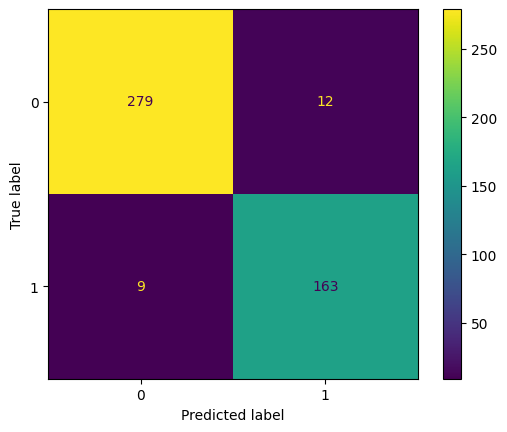

In [28]:
# Evaluate on the training set
predictions_train = gs_log_reg.predict(X_train) #predict on training set
print(f"Training Score with Best Model: {gs_log_reg.best_estimator_.score(X_train, y_train):.3f}\n{classification_report(y_train, predictions_train)}")
# Confusion Matrix
cm_train = confusion_matrix(y_train, predictions_train)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_train)
disp.plot()
plt.show()

Testing Score with Best Model: 0.983
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        73
           1       0.98      0.98      0.98        43

    accuracy                           0.98       116
   macro avg       0.98      0.98      0.98       116
weighted avg       0.98      0.98      0.98       116



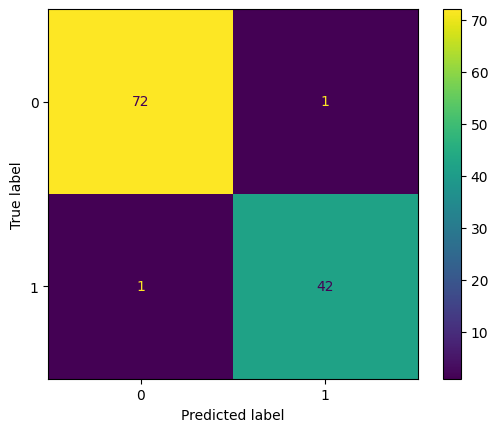

In [29]:
# Evaluate on test set
predictions_test = gs_log_reg.predict(X_test) #predict on test data
print(f"Testing Score with Best Model: {gs_log_reg.best_estimator_.score(X_test, y_test):.3f}\n{classification_report(y_test, predictions_test)}")
# Confusion Matrix
cm_test = confusion_matrix(y_test, predictions_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test)
disp.plot()
plt.show()

# <font color="green">**Question 4: Evaluation (8 marks)**</font>


## Evaluate the model that was developed by following the steps from previous notebooks, as explained in class.

For Question 4, comment on the results objectively, but do not provide any interpretation or discuss how the results relate to the research question or impact stakeholders, as these aspects will be covered in Question 5.

The best parameters that were found by the grid search were as follows:
* `C = 0.5`
* `class_weight = {1: 60, 0: 40}`
* `penalty = "l2"`
* `solver = "liblinear"`

This model provided a cross-validated F1-score of 0.943.

<br>

The best model was evaluated on the training data. It achieved an overall accuracy of 0.955. The per-class F1-scores were as follows:
* Class 0 (benign): 0.96
* Class 1 (malignant): 0.94

The precision scores per class on the training data were:
* Class 0 (benign): 0.97
* Class 1 (malignant): 0.93

The recall scores per class on the training data were:
* Class 0 (benign): 0.96
* Class 1 (malignant): 0.95

The confusion matrix shows that out of the 463 data points used in the training data:
* 279 were correctly classified as benign when they were benign (True Negative).
* 12 data points were incorrectly classified as malignant when they were actually benign (False Positive).
* 163 data points were correctly classified as malignant when they were indeed malignant (True Positive).  
* 9 data points were incorrectly classified as benign when they were actually malignant (False Negative).

<br>

After this, the best model was evaluated on the testing data. It achieved an overall accuracy of 0.98. The per-class F1-scores were as follows:
* Class 0 (benign): 0.99
* Class 1 (malignant): 0.98

The precision scores per class on the training data were:
* Class 0 (benign): 0.99
* Class 1 (malignant): 0.98

The recall scores per class on the training data were:
* Class 0 (benign): 0.99
* Class 1 (malignant): 0.98

The confusion matrix shows that out of the 116 data points used in the training data:
* 72 data points were correctly classified as benign when they were benign (True Negative).
* 1 data points were incorrectly classified as malignant when they were actually benign (False Positive).
* 42 data points were correctly classified as malignant when they were indeed malignant (True Positive).  
* 1 data points were incorrectly classified as benign when they were actually malignant (False Negative).



---



---



---



# <font color="green">**Question 5: Deployment, Monitoring and Maintenance (10 marks)**</font>




## Elaborate on the model’s strengths, limitations, pros, and cons, and explain whether or not you would deploy it. In your response, reflect on the ethical and human implications, including the potential impact on various stakeholders. Conclude with recommendations for deployment, monitoring, and maintenance that take these considerations into account.

## Use the results from Question 4 to support your rationale.

### **Model Strengths**

The logistic regression model demonstrates a consistently strong performance across cross-validation, training, and test evaluations, with the cross-validated F1-score of 0.943 and a test-set F1-score of 0.98 (alongside an overall accuracy of 0.98). The class-specific performance is balanced, where both the benign and malignant classes scored above a 0.98 F1-score in the test data. The misclassifications were very rare, with only 2 out of 116 data points being misclassified in the test-set. This may be through the best model's class weight choice of `{1: 60, 0: 40}`, where the model makes the decision boundary for malignancy tighter and reduces the likeliehood of missing malignanct cases, while maintaining a high precision.

### **Model Limitations**
Despite the metrics demonstrating high accuracy, the model is trained on a relatively small dataset of only 463 samples used for training, and 116 used for testing. This dataset likely cannot capture the huge variance of clinical imaging conditions, or even of patient characteristics and demographics. The test-set performance exceeding the cross-validated average may indicate that the held-out split might have been "easier" than most folds. Having a larger amount of data to train and test the model, as well as totally unseen data that may be produced by the same fine-needle aspiration procedure but from different clinicians at different hospitals/clinics would allow for external validation. Without this, the model's generalisability cannot be verified.

### **Ethical and Human Implications**

There are many ethnical and human implications of using a model to detect malignancy of tumours. In the clinical context, it is imperative to avoid unnecessary intervention but ensure that all malignant tumours are identified. False negatives can pose extremely serious consequences and health risks for patients, who may end up delaying treatment or not receiving any until it is too late. On the other hand, a false positive can cause significant anxiety and unwarranted procedures, many of which can be invasive and difficult to recover from. There must be transparency on the use of such models to detect malignancy, and the findings must be corroborated to minimise the risk of false negatives and false positives.

Another ethical implication to consider is about the use of patient data to train models. Patients must provide their explicit consent that their data will be used to train and develop models, and the process of using patient data must abide by the relevant data privacy regulations of the region the model is developed and deployed in. This is particularly important to ensure that sensitive patient information is handled securely and that patient characteristics remain non-identifiable to a singular person.

Moreover, another implication about this model's use lies in the patient demographics of the dataset used to develop the model. If certain demographics are over- or underrepresented, there may be significant performance disparities which can give rise to inequitable care.

### **Deployment, Monitoring, and Maintenance**

The model's high sensitivity to malignancy and low misclassification rates, while promising, still demonstrate potential for misclassification which can be harmful to patients. In the clinical context, this model should not be used to make a final diagnosis but rather as a decision-support tool. The deployment of this model should be integrated into a workflow where there are steps to corroborate and confirm all cases, and the model could be used to flag cases that might require a second opinion or further investigation. For example, this model could be used within a single department of a hospital to begin gathering real-world performance metrics and user feedback from clinicians, as well as the feedback of patients who may have their data used to train the model. Training clinicians is crucial to ensure the interpretability of the results, and to recognise edge cases and respond to flags from the model in the appropriate manner.

To maintain clinical safety and efficacy, the model requires continuous performance tracking and governance. The key metrics of F1-score, precision, recall, and the classifications of the confusion matrix should be maintained for each batch of new cases that are fed through the model, and there should be strict, pre-defined thresholds to flag performance degredation. For example, if the model is fed new data monthly, and the monthly F1-score drops to below 0.95, there should be an alert to the model maintainers to investigate the drop in recall. Ongoing monitoring across different patient characteristics, including but not limited to age, sex, race/ethnicity should be done by conducting bias audits. The performance of the model when these patient characteristics are segmented should be reviewed to check for bias and potential unfairness.

To keep the model updated with new information, a retraining strategy should be applied. Using a trigger-based retraining strategy (e.g., after 500 new cases) may be worthwhile as regular intervals (i.e. quarterly) can have significantly different amounts of data, and may not be worth the amount of resources necessary to train the model (especially if its gets larger and more complex).

As with all scripts, the model should maintain good governance and documentation. There should be clear version control of the data, code, and of any noticeable model artifacts. Updates to the model, changes in performance, and user feedback should be documented too.



---



---



---

